<a href="https://colab.research.google.com/github/aimbsg/EVA4_S7/blob/master/EVA4_S7_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
!pip install torchsummary
from torchsummary import summary
%matplotlib inline

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



plane   cat  frog horse


torch.Size([4, 3, 32, 32])

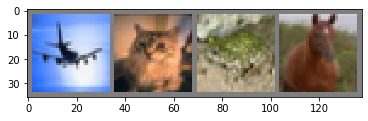

In [0]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

images.shape

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
my_path = "/content/gdrive/My Drive/EVA4_S7_CIFAR10_Moduled"
import sys
sys.path.append(my_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import EVA4_S7_backbone as backbone

In [0]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = backbone.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,640
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
         MaxPool2d-9           [-1, 32, 16, 16]               0
           Conv2d-10           [-1, 64, 16, 16]          18,496
      BatchNorm2d-11           [-1, 64, 16, 16]             128
             ReLU-12           [-1, 64, 16, 16]               0
          Dropout-13           [-1, 64, 16, 16]               0
           Conv2d-14          [-1,

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [0]:
for epoch in range(25):  # loop over the dataset multiple times  
    backbone.train(model,device,trainloader,optimizer,criterion,epoch)
print('Training Complete')

[1,  2000] loss: 2.038
[1,  4000] loss: 1.845
[1,  6000] loss: 1.739
[1,  8000] loss: 1.660
[1, 10000] loss: 1.537
[1, 12000] loss: 1.458
[2,  2000] loss: 1.324
[2,  4000] loss: 1.303
[2,  6000] loss: 1.256
[2,  8000] loss: 1.224
[2, 10000] loss: 1.158
[2, 12000] loss: 1.131
[3,  2000] loss: 1.066
[3,  4000] loss: 1.050
[3,  6000] loss: 1.012
[3,  8000] loss: 0.998
[3, 10000] loss: 0.980
[3, 12000] loss: 0.970
[4,  2000] loss: 0.880
[4,  4000] loss: 0.903
[4,  6000] loss: 0.884
[4,  8000] loss: 0.886
[4, 10000] loss: 0.878
[4, 12000] loss: 0.843
[5,  2000] loss: 0.769
[5,  4000] loss: 0.787
[5,  6000] loss: 0.779
[5,  8000] loss: 0.777
[5, 10000] loss: 0.798
[5, 12000] loss: 0.765
[6,  2000] loss: 0.678
[6,  4000] loss: 0.707
[6,  6000] loss: 0.716
[6,  8000] loss: 0.689
[6, 10000] loss: 0.695
[6, 12000] loss: 0.685
[7,  2000] loss: 0.631
[7,  4000] loss: 0.644
[7,  6000] loss: 0.639
[7,  8000] loss: 0.650
[7, 10000] loss: 0.628
[7, 12000] loss: 0.628
[8,  2000] loss: 0.563
[8,  4000] 

In [0]:
backbone.val_acc(testloader,model,device)

Accuracy of the network on the 10000 test images: 80.200000 %


In [0]:
bakbone.class_acc(testloader,model,device,classes)

Accuracy of plane : 87 %
Accuracy of   car : 90 %
Accuracy of  bird : 67 %
Accuracy of   cat : 61 %
Accuracy of  deer : 81 %
Accuracy of   dog : 78 %
Accuracy of  frog : 83 %
Accuracy of horse : 82 %
Accuracy of  ship : 85 %
Accuracy of truck : 87 %
